In [12]:
import pandas as pd
import os
import sys
import glob
import json
from os.path import expanduser
import matplotlib.pyplot as plt                   # For graphics
import numpy as np
from agavepy.agave import Agave, AgaveError
from agavepy.files.download import files_download
%matplotlib inline




%load_ext autoreload
%reload_ext autoreload
%autoreload 2


from pysd2cat.analysis import live_dead_analysis as lda
from pysd2cat.analysis.Names import Names
from pysd2cat.analysis import biofab_live_dead_analysis as blda
from pysd2cat.plot import biofab_live_dead_plots as bldp

from pysd2cat.data import pipeline

out_dir='.' # test harness output

experiments = [
    'experiment.uw_biofab.34601',
    'experiment.uw_biofab.34600',
    'r1dd37mcxv5pf4',
    'r1dk8xp9dymm54'
]

run_strain = {
    'experiment.uw_biofab.34600' : 'CEN.PK2 - MAT A',
    'experiment.uw_biofab.34601' : 'S288c_a',
    'r1dd37mcxv5pf4' : 'S288c_a',
    'r1dk8xp9dymm54' : 'S288c_a'
}

experiment_lab = {
    'experiment.uw_biofab.34600' : 'BioFab',
    'experiment.uw_biofab.34601' : 'BioFab',
    'r1dd37mcxv5pf4' : 'TX',
    'r1dk8xp9dymm54' : 'TX'
}

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [157]:
tmp_df = pd.read_csv('data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/data.csv')
tmp_df

Unnamed: 0                                  checksum                                                                                                                      filename     kill  kill_volume            stain well   experiment_id    Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1-H   RL1-H   FSC-W   SSC-W  BL1-W  RL1-W
0        0           2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  0.0     1048575.0  1048575.0  5173.0  33761.0  80003.0  344441.0  691.0  3140.0  1023.0  1023.0  0.0    0.0  
1        1           2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  1.0     66174.0    136503.0   86.0    66.0     57621.0  115596.0  69.0   83.0    39.0    47.0    0.0    0.0  
2        2           2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  1.0     16491.0    103941.0   53.0    94.0     15601.0  100780.0  70.0   104.0   18.0    41.0    0.0    0.0  
3        3           2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  2.0     37507.0    66202.0    13.0    43.0     36854.0  62519.0   74.0   83.0    31.0    36.0    0.0    0.0  
4        4           2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  2.0     34649.0    94510.0    2.0     146.0    35297.0  93987.0   50.0   110.0   29.0    38.0    0.0    0.0  
...     ..                                                ...                                                                                                                           ...      ...    ...                    ...  ..              ...  ...         ...        ...    ...       ...        ...      ...    ...     ...    ...     ...    ...    ...  
1199995  1267437     7147b39ec82911ea4f708c1b937a4180813e6dc5  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_B6.fcs  Ethanol  300.0        SYTOX Red Stain  b6   r1dk8xp9dymm54  5579.0  102511.0   165523.0  -37.0   -64.0     72928.0  123193.0  65.0   203.0   48.0    52.0    0.0    0.0  
1199996  1267438     7147b39ec82911ea4f708c1b937a4180813e6dc5  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_B6.fcs  Ethanol  300.0        SYTOX Red Stain  b6   r1dk8xp9dymm54  5579.0  62959.0    124686.0   119.0  -4.0      39544.0  92001.0   134.0  170.0   47.0    52.0    0.0    0.0  
1199997  1267439     7147b39ec82911ea4f708c1b937a4180813e6dc5  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_B6.fcs  Ethanol  300.0        SYTOX Red Stain  b6   r1dk8xp9dymm54  5579.0  51565.0    85920.0    211.0   48.0     45904.0  77078.0   178.0  280.0   34.0    39.0    0.0    0.0  
1199998  1267440     7147b39ec82911ea4f708c1b937a4180813e6dc5  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_B6.fcs  Ethanol  300.0        SYTOX Red Stain  b6   r1dk8xp9dymm54  5579.0  40690.0    122257.0   156.0   183.0    37881.0  110989.0  114.0  276.0   31.0    44.0    0.0    0.0  
1199999  1267441     7147b39ec82911ea4f708c1b937a4180813e6dc

In [161]:
tmp_df[['well', 'kill_volume', 'stain']].drop_duplicates().sort_values(by=['well'])
tmp_df.kill_volume.dropna().unique()

array([300.,   0.])

In [135]:
## Destructive (be careful)
#blda.drop_experiment_from_leader_board('.', 'r1dk8xp9dymm54')

In [163]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
len(leader_board_df)

644

No handles with labels found to put in legend.


12    10
11    10
10    10
9     10
8     10
7     10
6     10
5     10
4     10
3     10
2     10
1     10
Name: time_point, dtype: int64


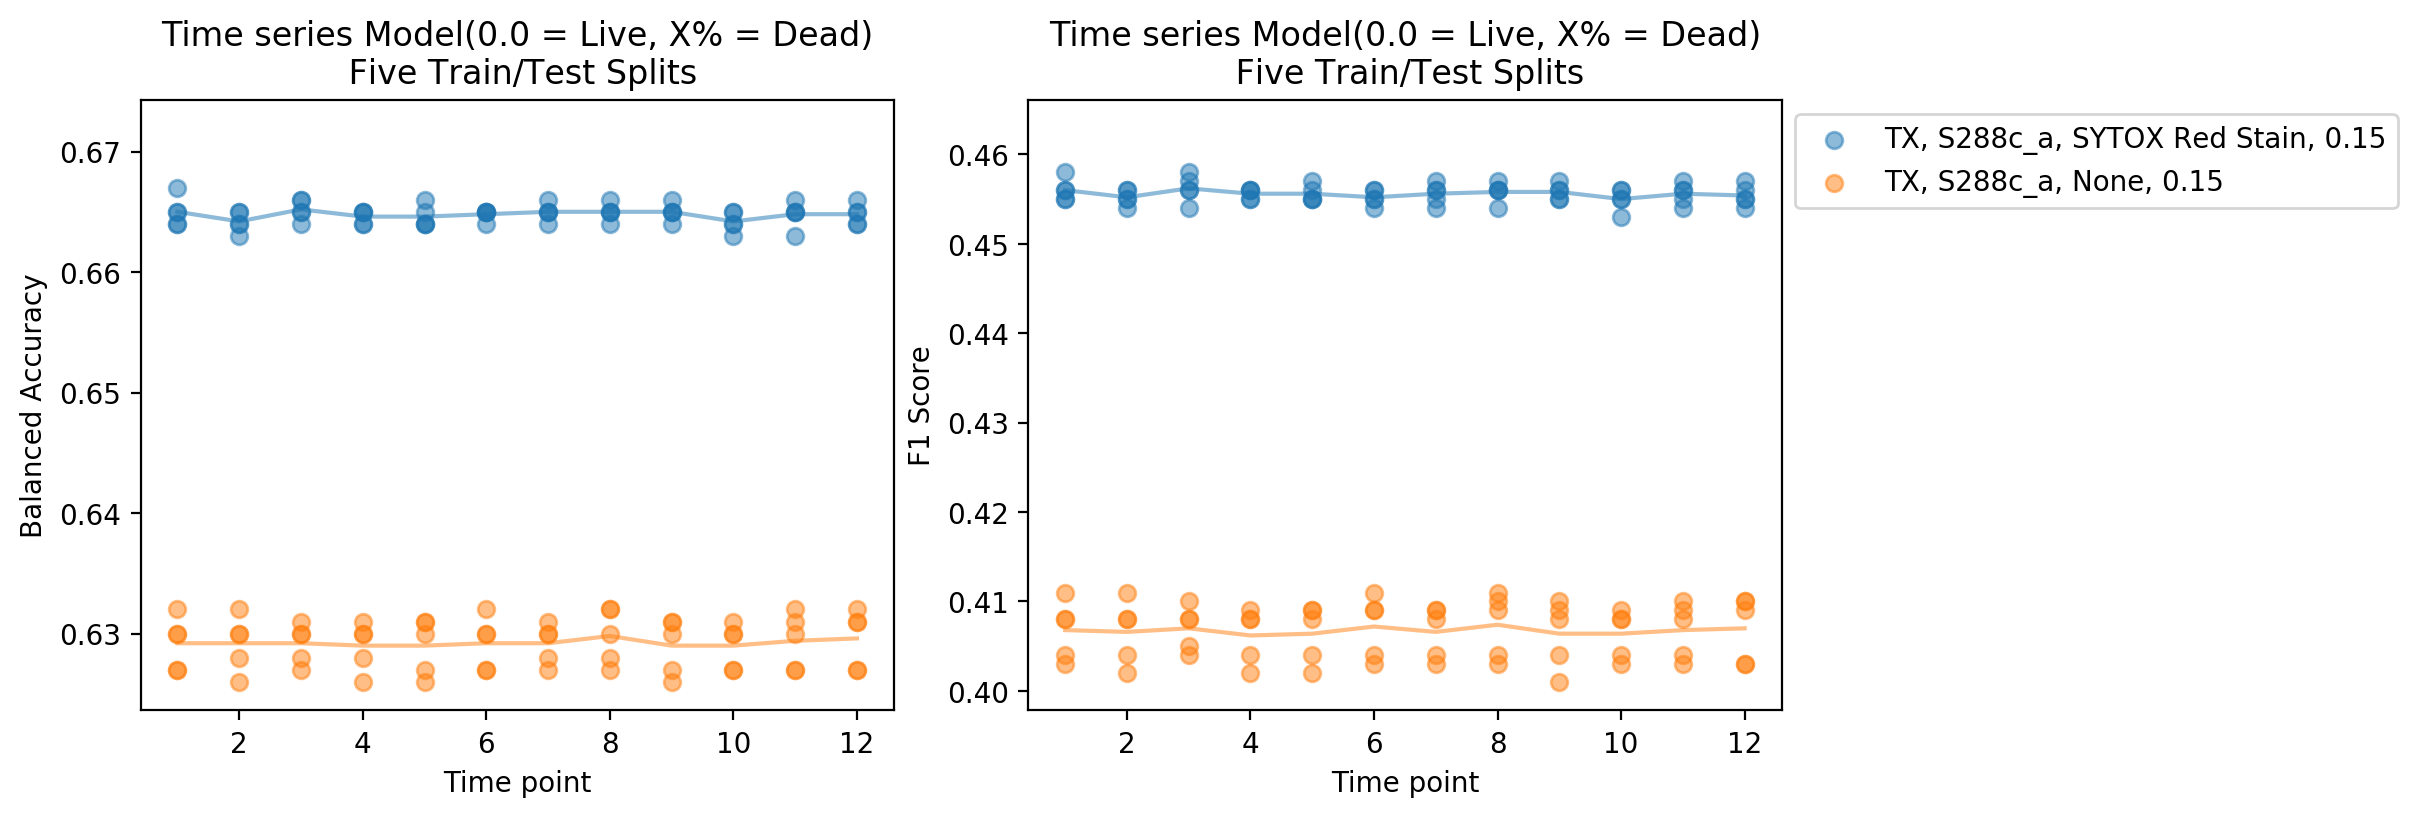

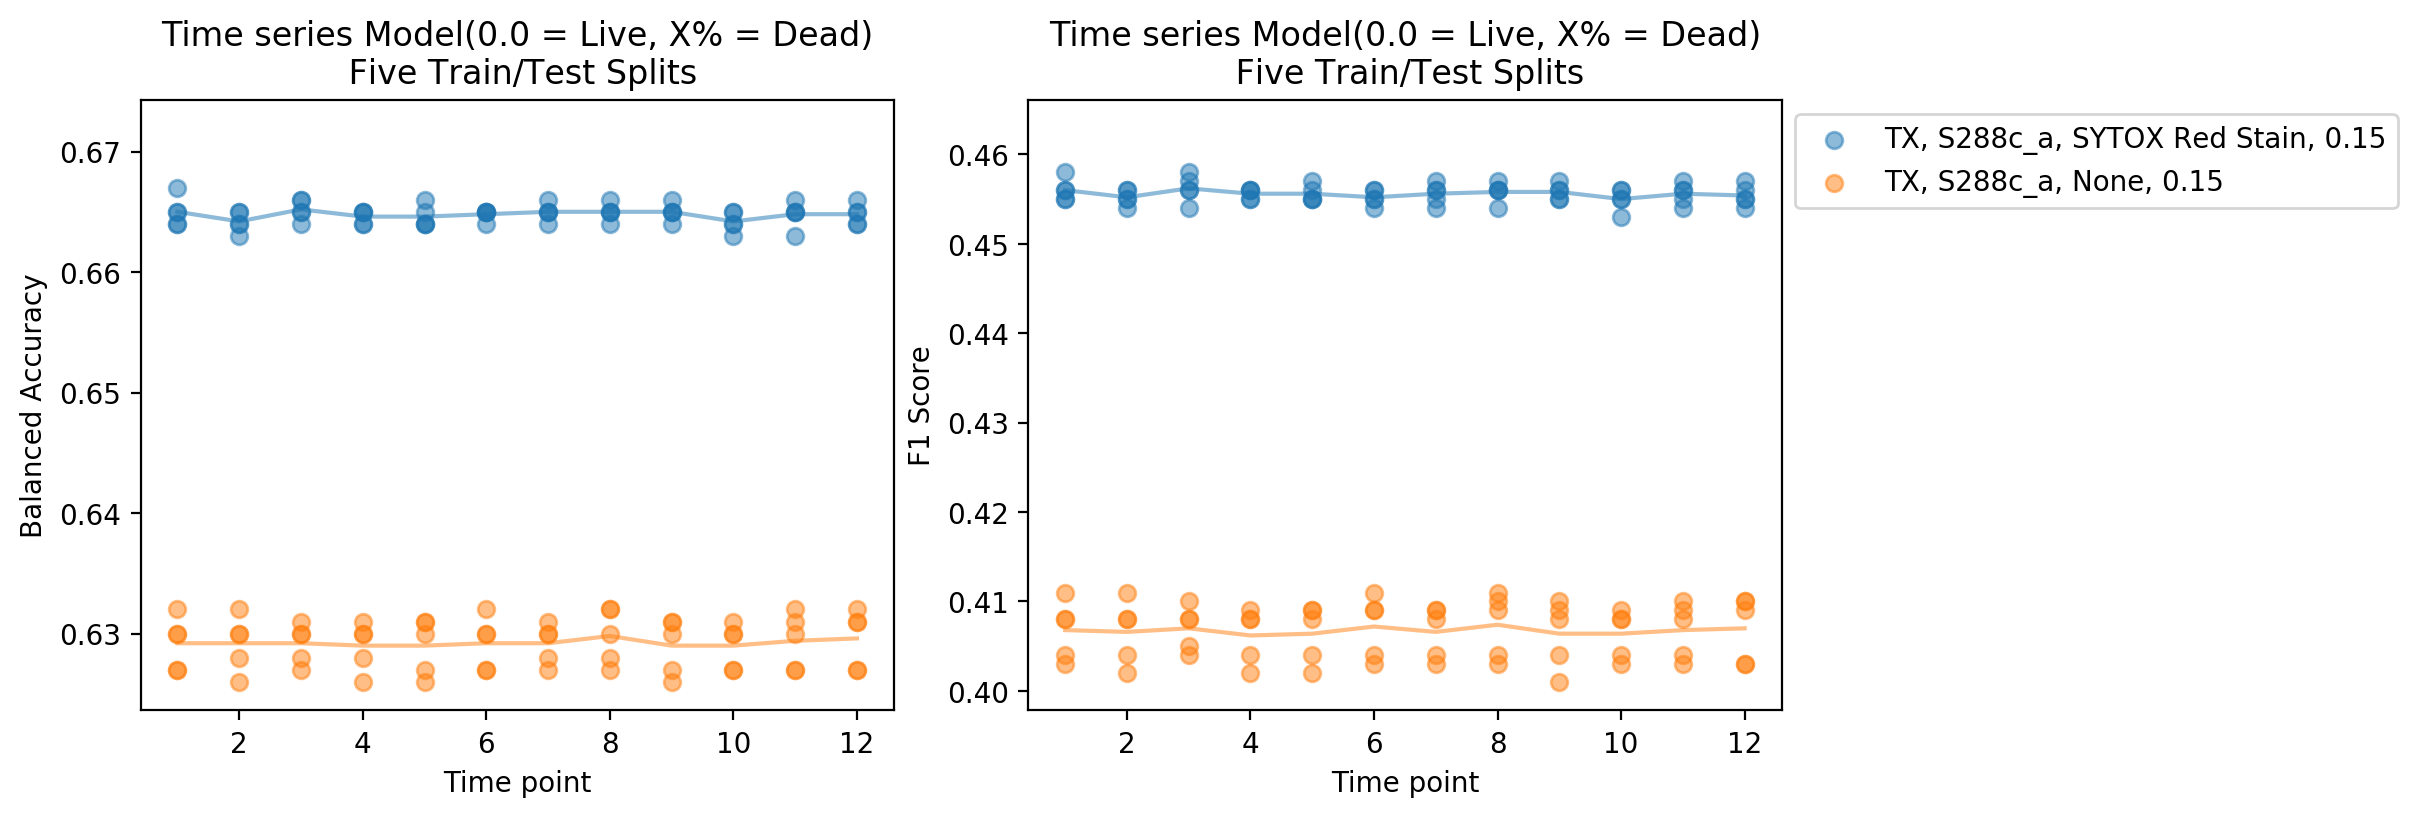

In [164]:
df = leader_board_df.loc[leader_board_df['Data and Split Description'].str.contains('r1dk8xp9dymm54')]
df = df.dropna(subset=['time_point'])
df = df.astype({'time_point': 'int32'})
print(df.time_point.value_counts())
bldp.get_statistics_by_time(df, experiment_strain=run_strain, experiment_lab=experiment_lab)


/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/numpy/lib/arraysetops.py:568: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


['SYTOX Red Stain' nan]
                                   checksum                                                                                                                      filename     kill  kill_volume            stain well   experiment_id  Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1-H   RL1-H   FSC-W   SSC-W  BL1-W  RL1-W
0  2a82dd9f1492317166ee0827a8d61fb17d3c8321  data/transcriptic/r1dk8xp9dymm54/Flow_(Sytox)_Plate_2/fcs/CellDeath-EtOH-09-19-2019-T1_Sytox-YeastGates_SytoxYG-Plate_A7.fcs  Ethanol  300.0        SYTOX Red Stain  a7   r1dk8xp9dymm54  0.0   1048575.0  1048575.0  5173.0  33761.0  80003.0  344441.0  691.0  3140.0  1023.0  1023.0  0.0    0.0  
                                   checksum                                                                                                                      filename     kill  kill_volume            stain well   experiment_id  Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1

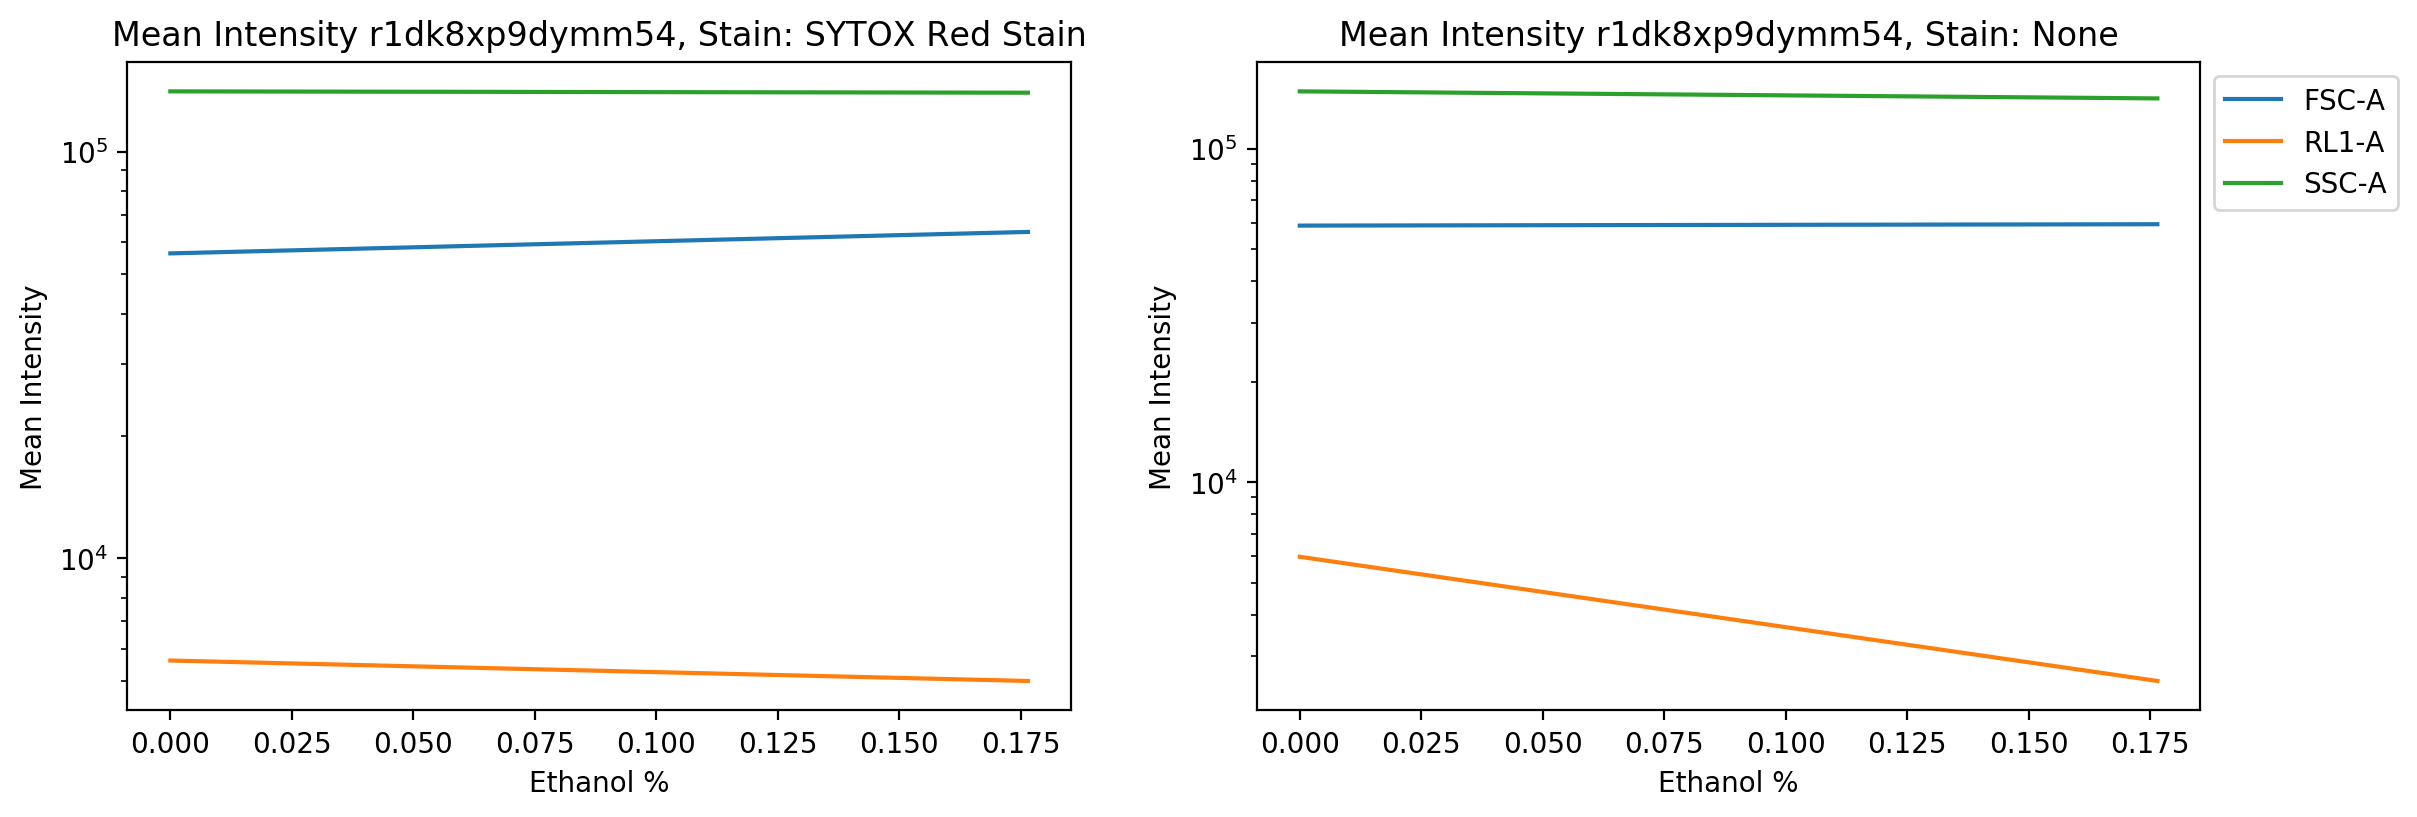

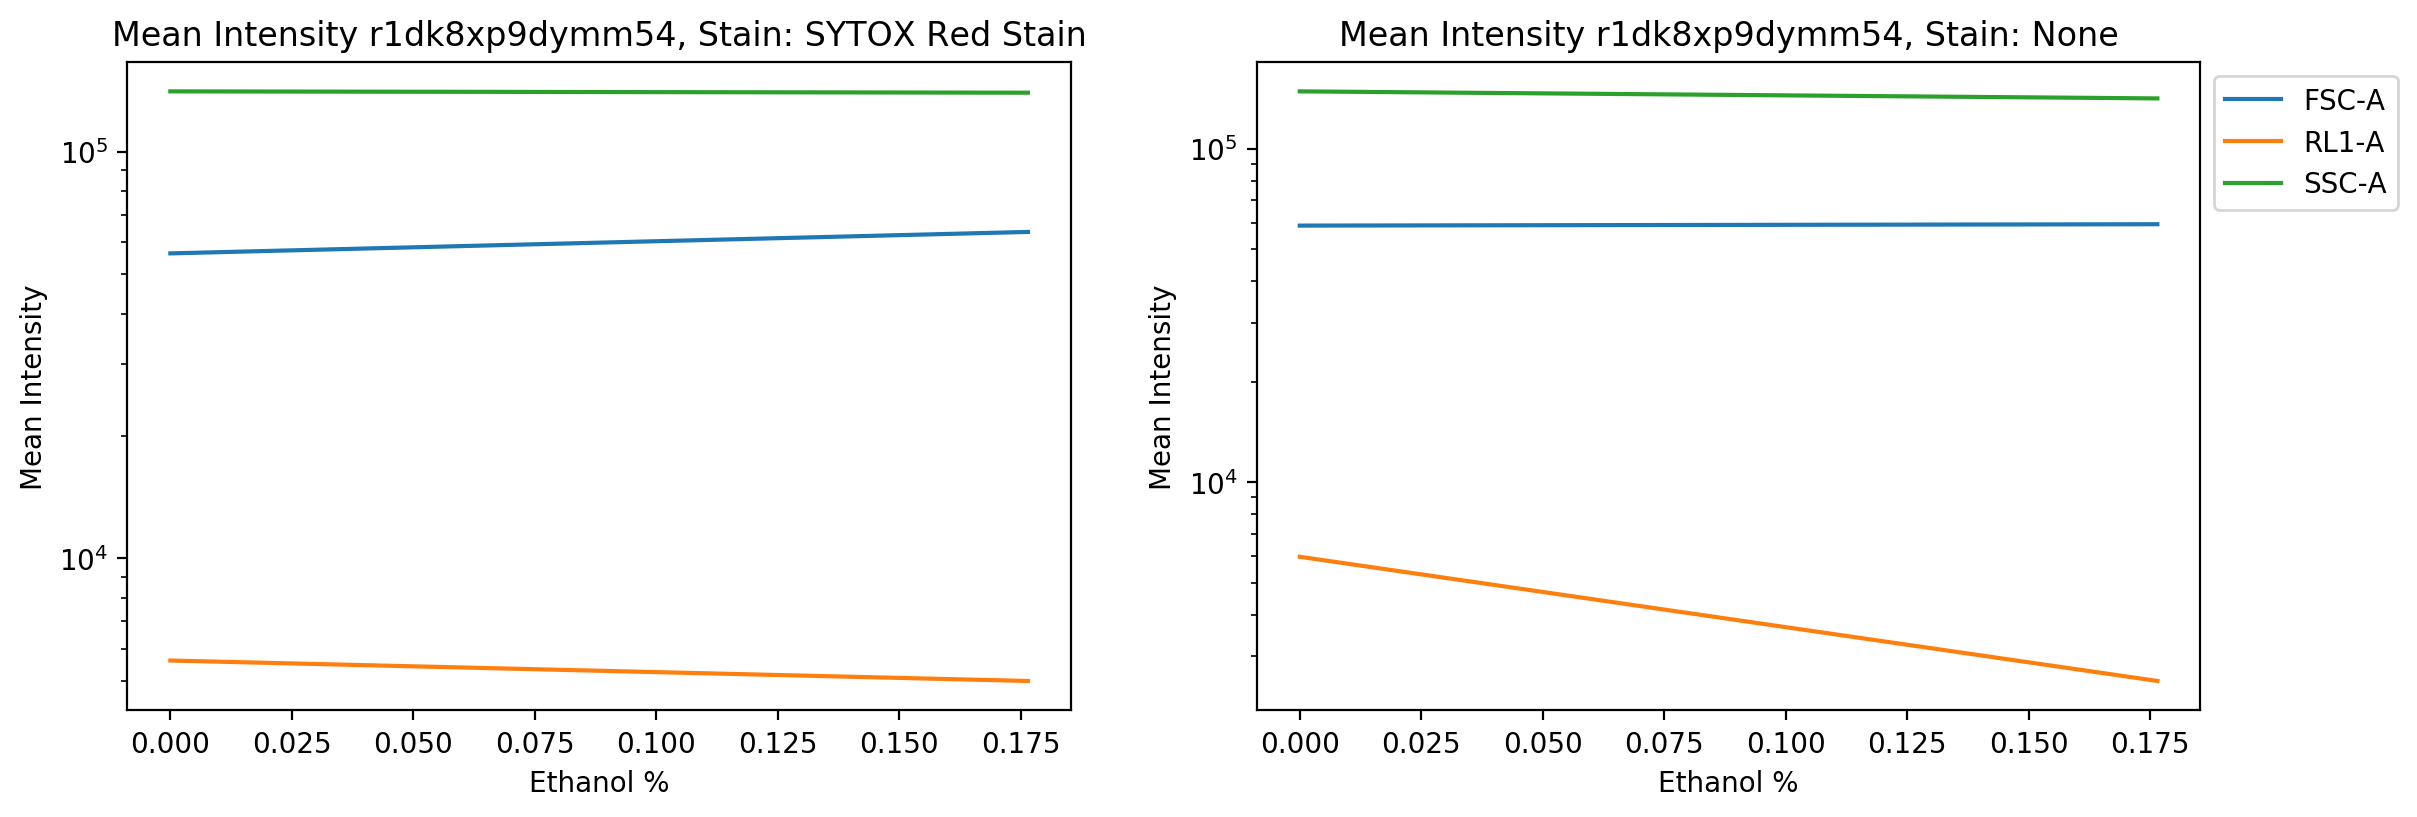

In [162]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'r1dk8xp9dymm54', 'Flow_(Sytox)_Plate_2', 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W']
channels=['FSC-A', 'SSC-A', 'RL1-A']
bldp.get_channel_mean_timeseries(experiment_df, 
                               channels=channels,
                                stat=np.std
                               )

['experiment.uw_biofab.34601' 'experiment.uw_biofab.34600'
 'r1dd37mcxv5pf4' 'r1dk8xp9dymm54']


No handles with labels found to put in legend.


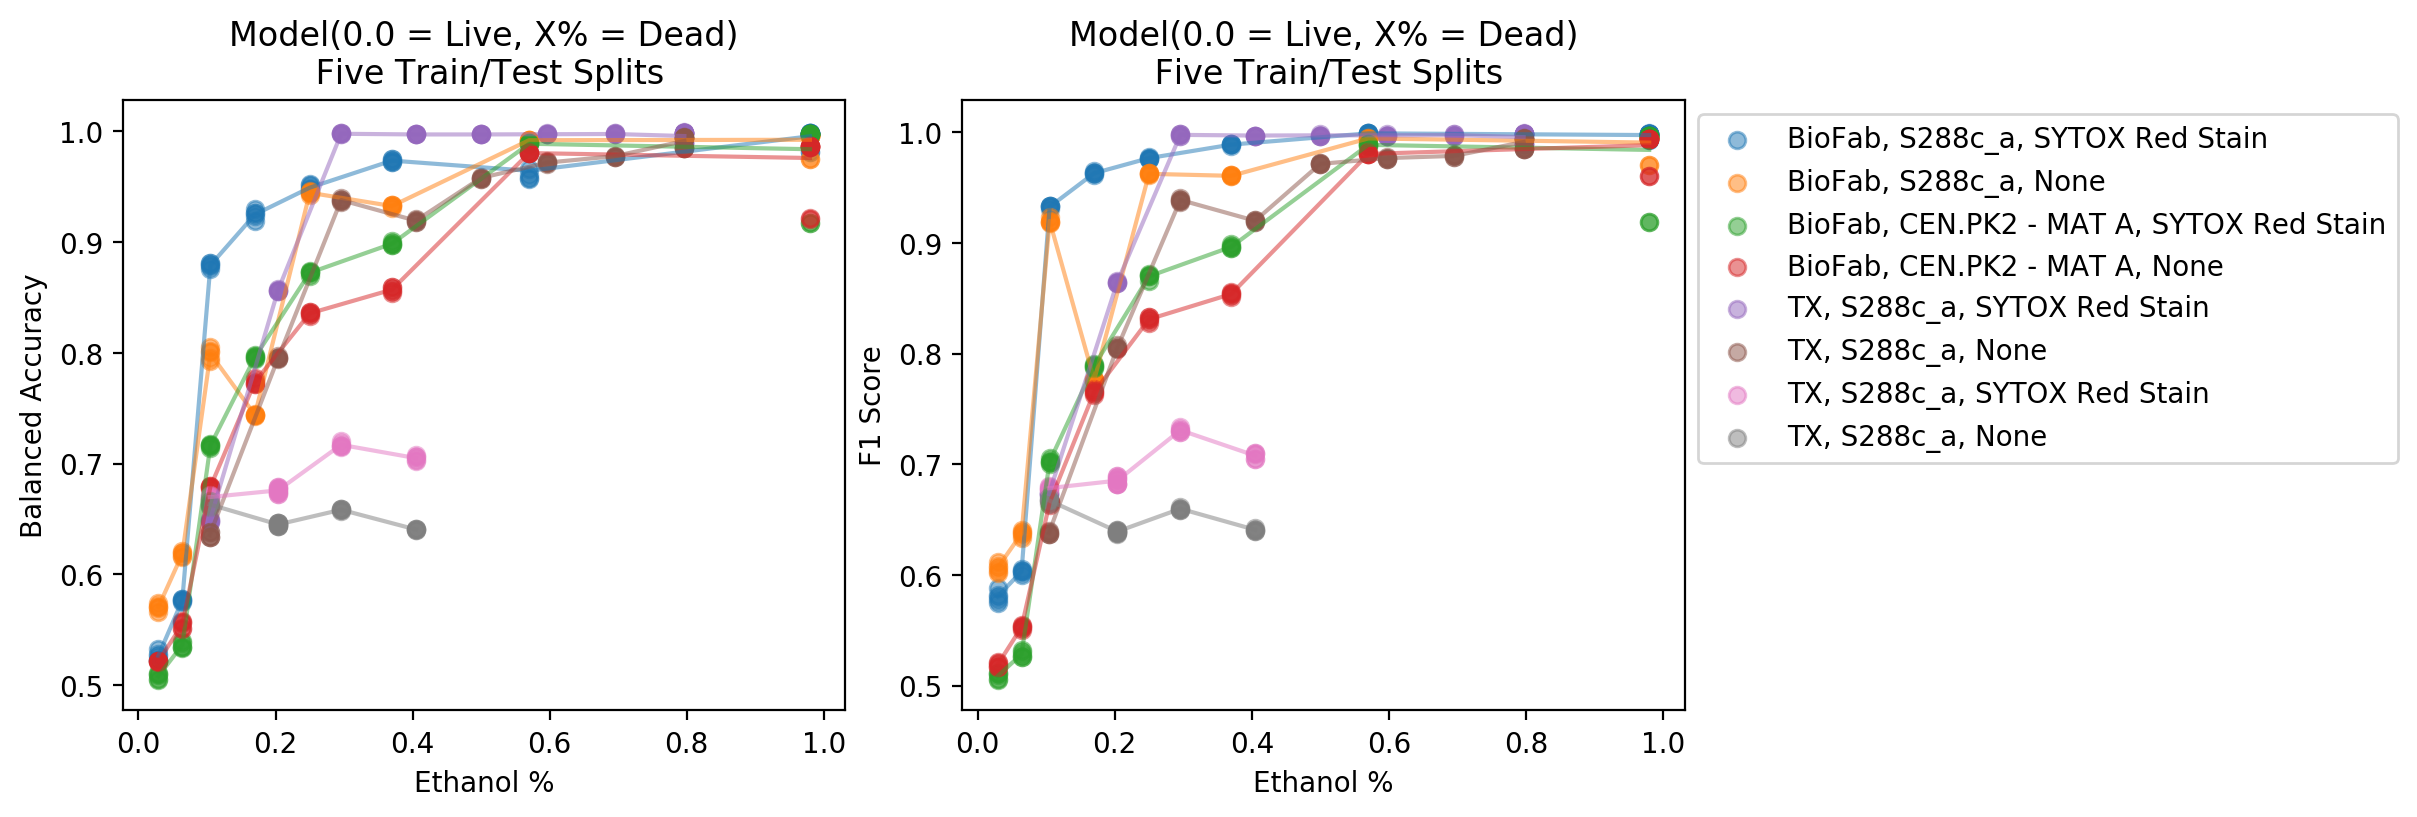

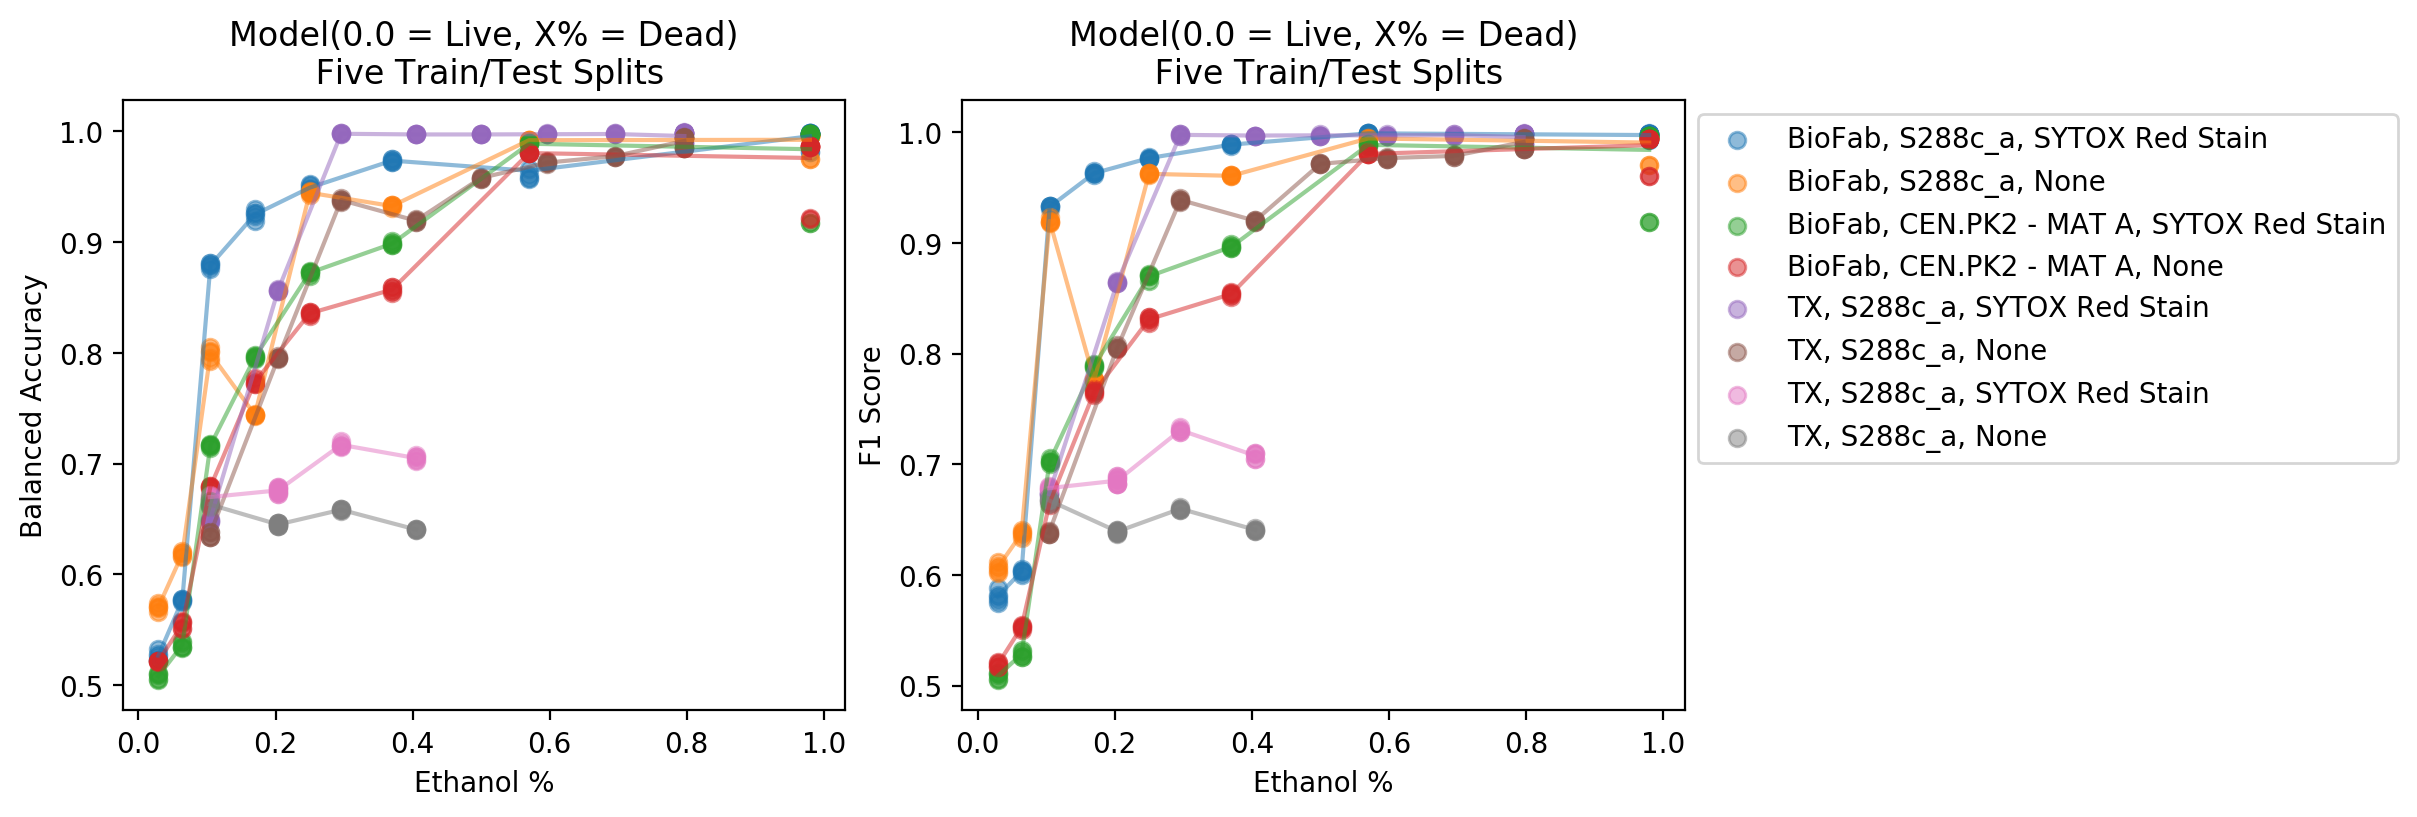

In [30]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
#leader_board_df.loc[leader_board_df['stain'].isna()]
bldp.get_statistics_by_volume(leader_board_df, experiment_strain=run_strain, experiment_lab=experiment_lab)

(<Figure size 1600x800 with 2 Axes>, mean    0.011648
 std     0.018305
 dtype: float64)

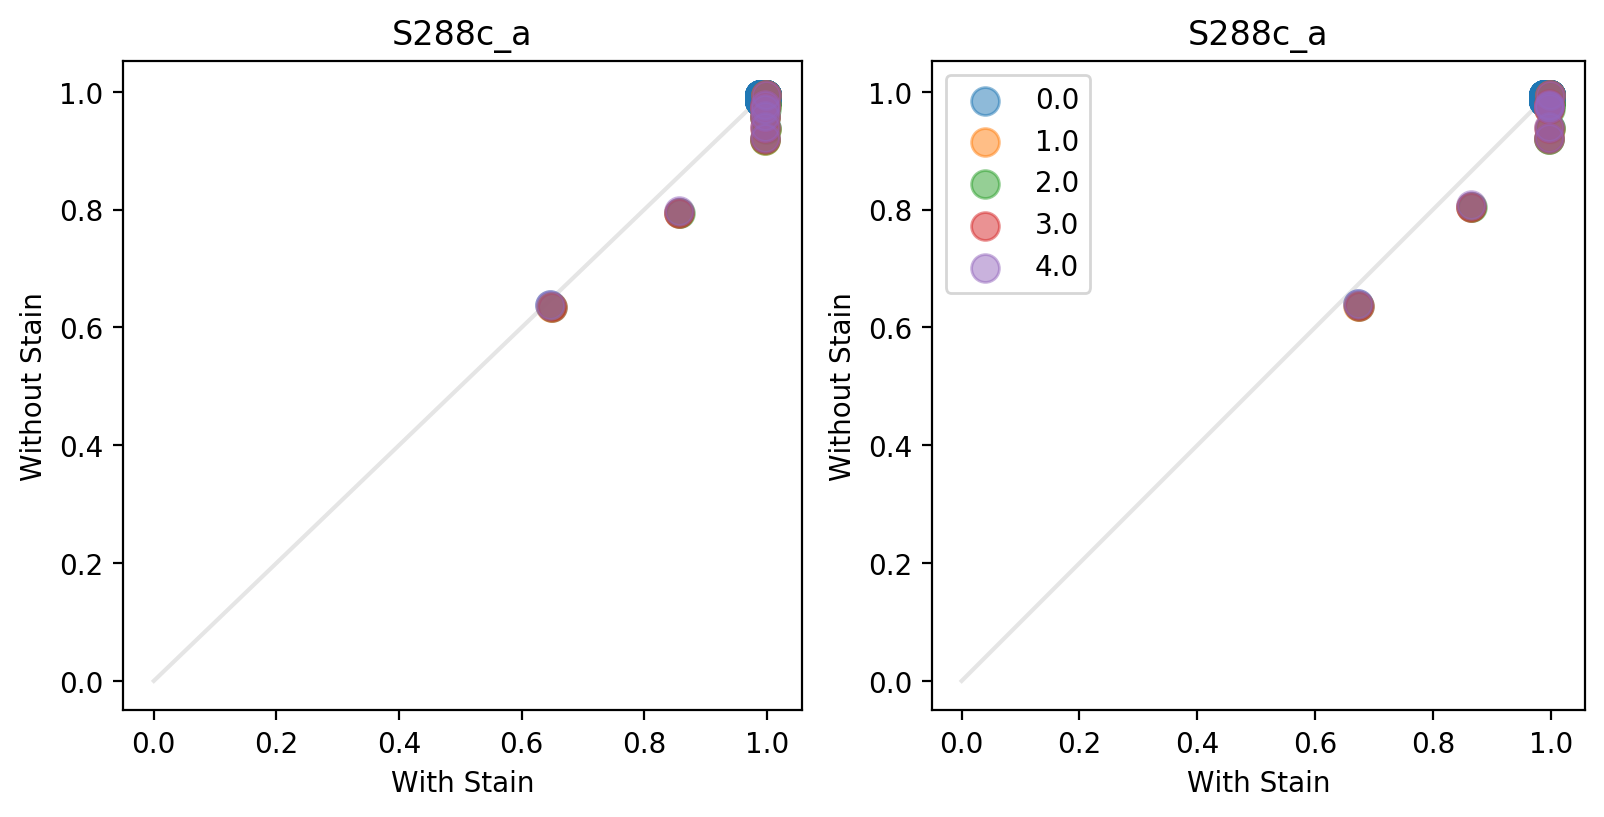

In [182]:
leader_board_df = blda.get_leader_board_df('.', expand_description=True)
bldp.get_stain_scatter(leader_board_df, experiments[2], experiment_strain=run_strain)

Index(['Container Type', 'Control', 'Culture_Volume', 'Media', 'Replicate', 'Storage (C)', 'Strain', 'checksum', 'filename', 'kill', 'kill_volume', 'plate_id', 'source', 'stain', 'well', 'experiment_id', 'Time', 'FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W', 'BL1-W', 'RL1-W', 'index', 'live', 'live_ss'], dtype='object')


Text(0.5, 0, 'Ethanol %')

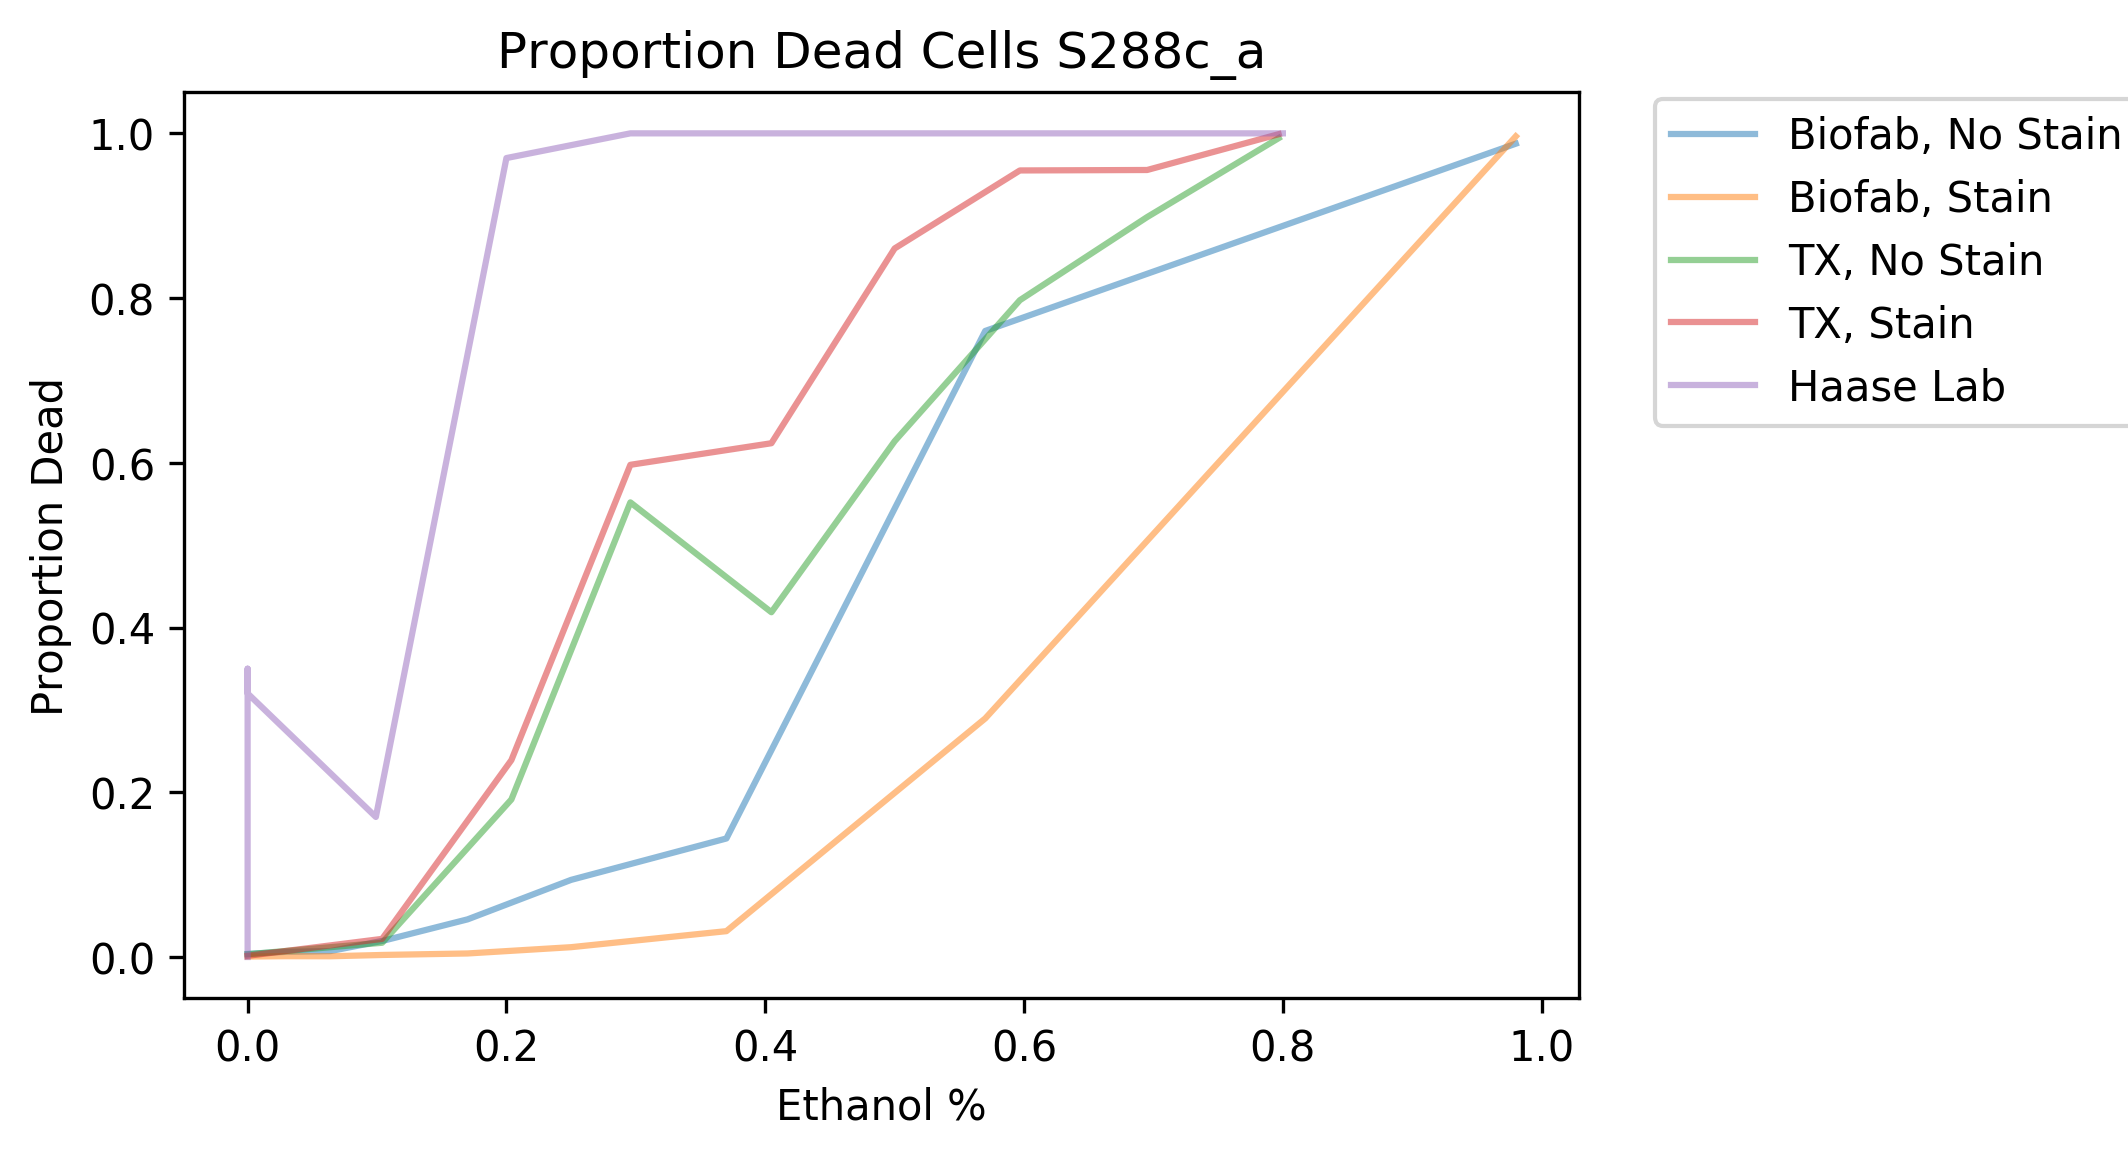

In [199]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')

data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


data_dir1 = os.path.join('data/transcriptic')
all_data_file1 = os.path.join(data_dir1, 'data.csv')
experiment_df1 = pd.read_csv(all_data_file1, index_col=0)
print(experiment_df1.columns)

#dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume',  'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = dead_proportion.loc[dead_proportion.kill_volume != "None"]
#dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = dead_proportion_ss.loc[dead_proportion_ss.kill_volume != "None"]


#dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'well', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = dead_proportion1.loc[dead_proportion1.kill_volume != "None"]
dead_proportion1_ss = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion1_ss = dead_proportion1_ss.loc[dead_proportion1_ss.kill_volume != "None"]



#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure(dpi=300)
ax = plt.subplot(111)
percentages=[ 100*x for x in [0, .03, .06, .10, .15, .20, .27, .36, .49]]

df=dead_proportion.loc[dead_proportion.stain == "None"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, No Stain", alpha=0.5)
df=dead_proportion.loc[dead_proportion.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, Stain", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, No Stain, SS", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "SYTOX Red Stain"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, Stain, SS", alpha=0.5)


df=dead_proportion1.loc[dead_proportion1.stain == "None"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, No Stain", alpha=0.5)
df=dead_proportion1.loc[dead_proportion1.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, Stain", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, No Stain, SS", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "SYTOX Red Stain"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, Stain, SS", alpha=0.5)


ax.plot(robs_experiment["Ethanol vol (ul)"]/(robs_experiment["Ethanol vol (ul)"]+robs_experiment["culture vol (ul)"]), 
        robs_experiment['% Dead'], label="Haase Lab", alpha=0.5)
#ax.bar()
#ax.set_xscale('log')
fig.legend(bbox_to_anchor=(1.2, 0.9))
plt.title("Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol %")
#plt.xticks(range(0, len(volumes)), volumes)


Index(['Container Type', 'Control', 'Culture_Volume', 'Media', 'Replicate', 'Storage (C)', 'Strain', 'checksum', 'filename', 'kill', 'kill_volume', 'plate_id', 'source', 'stain', 'well', 'experiment_id', 'Time', 'FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W', 'BL1-W', 'RL1-W', 'index', 'live', 'live_ss'], dtype='object')


Text(0.5, 0, 'Ethanol %')

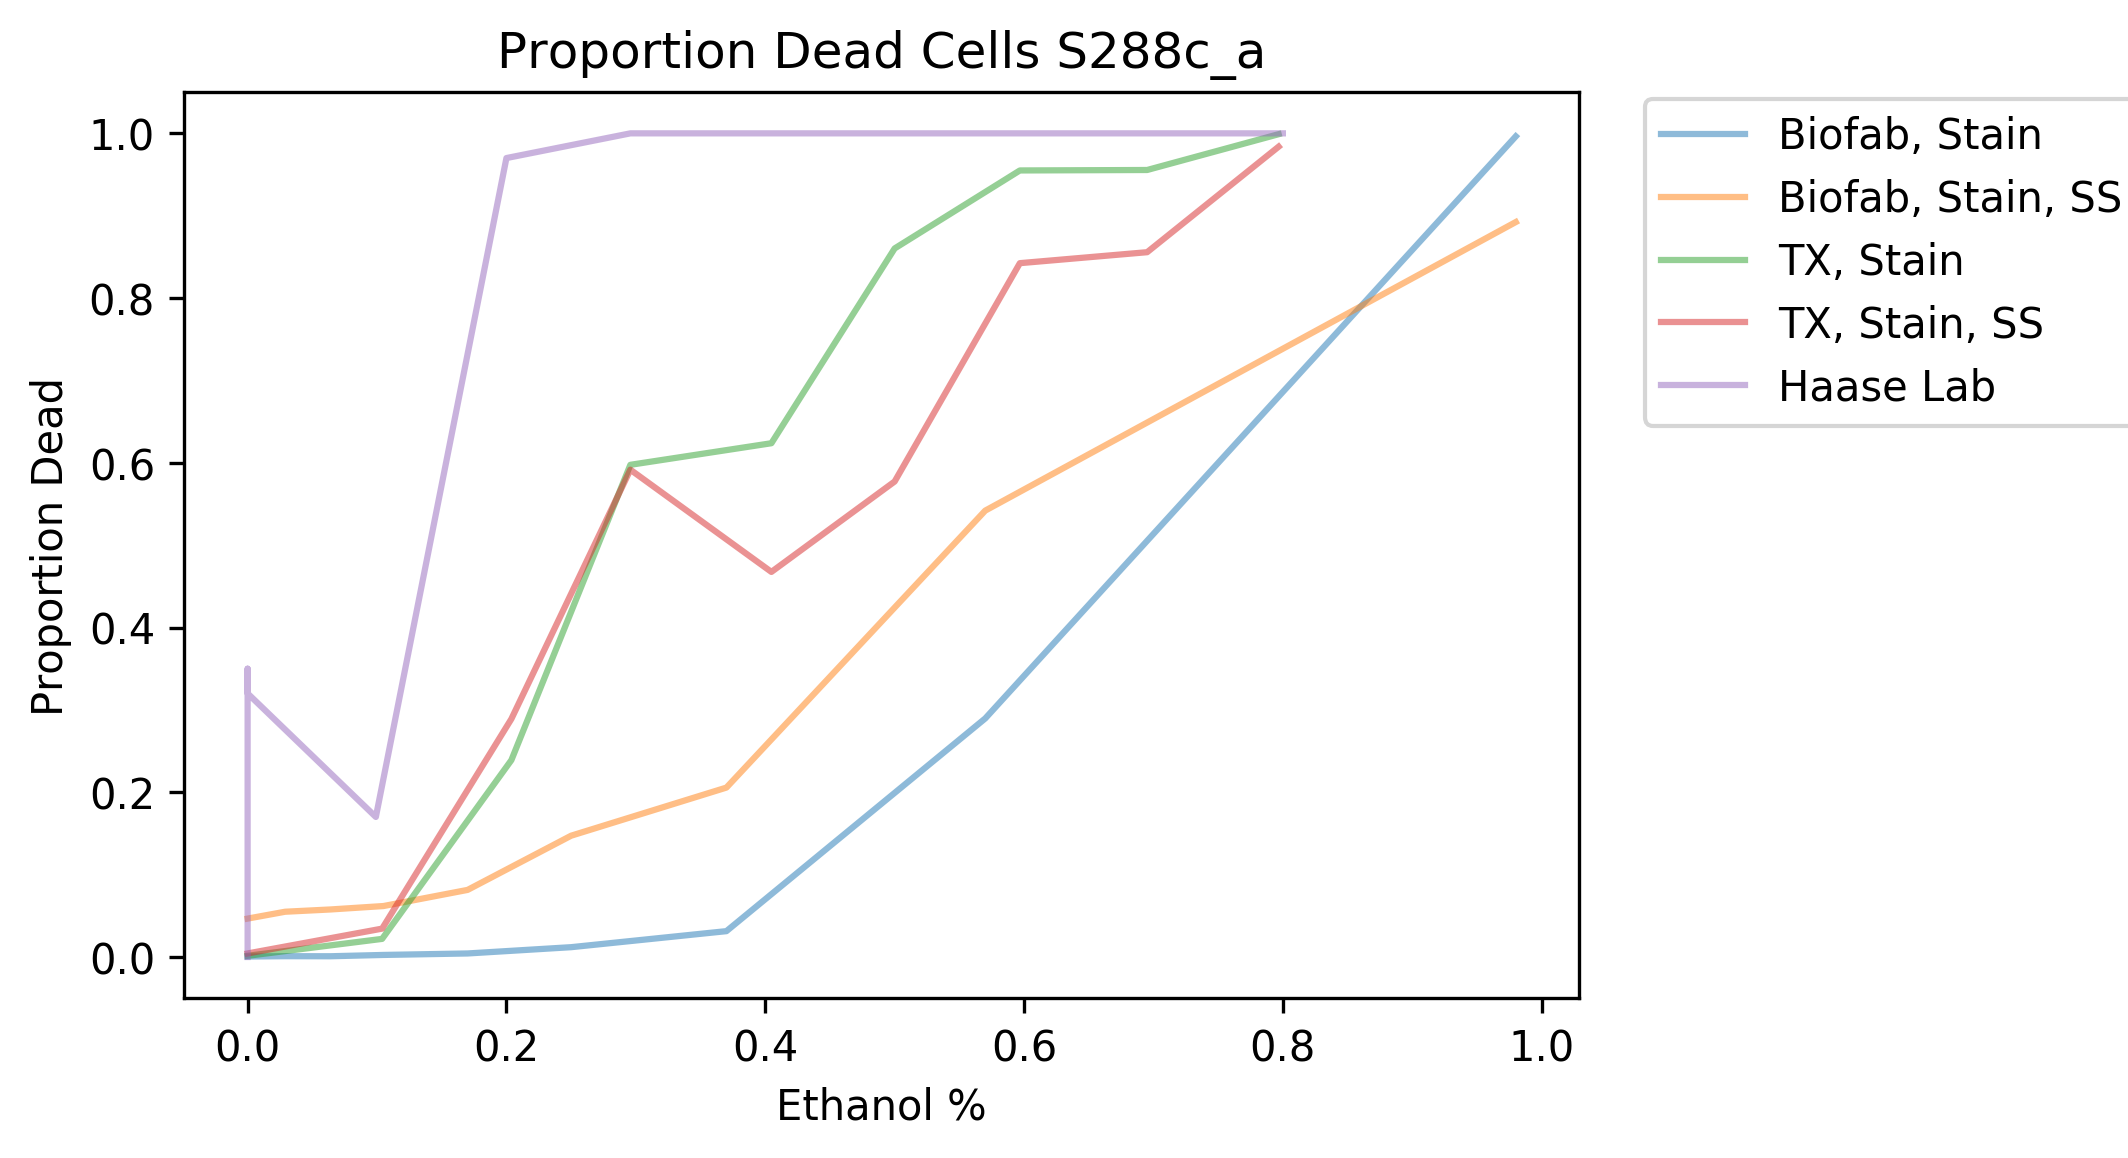

In [200]:
# For each sample, what proportion are dead?

robs_experiment = pd.read_csv('../resources/6-12_percent_dead.csv')

data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


data_dir1 = os.path.join('data/transcriptic')
all_data_file1 = os.path.join(data_dir1, 'data.csv')
experiment_df1 = pd.read_csv(all_data_file1, index_col=0)
print(experiment_df1.columns)

#dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume',  'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion = dead_proportion.loc[dead_proportion.kill_volume != "None"]
#dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'sample_id', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = experiment_df.where((pd.notnull(experiment_df)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion_ss = dead_proportion_ss.loc[dead_proportion_ss.kill_volume != "None"]


#dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'well', 'stain'])['live'].agg(lambda x: 1 - x.mean()).groupby(['kill_volume', 'stain']).agg(np.mean).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live' : 'dead'})
dead_proportion1 = dead_proportion1.loc[dead_proportion1.kill_volume != "None"]
dead_proportion1_ss = experiment_df1.where((pd.notnull(experiment_df1)), "None").groupby(['kill_volume', 'stain'])['live_ss'].agg(lambda x: 1 - x.mean()).reset_index().rename(columns={'live_ss' : 'dead_ss'})
dead_proportion1_ss = dead_proportion1_ss.loc[dead_proportion1_ss.kill_volume != "None"]



#experiment_id = experiment_df.experiment_id.dropna().unique()[0]
experiment_id = experiment_df.strain.dropna().unique()[0]
#print(dead_proportion)
fig = plt.figure(dpi=300)
ax = plt.subplot(111)
percentages=[ 100*x for x in [0, .03, .06, .10, .15, .20, .27, .36, .49]]

#df=dead_proportion.loc[dead_proportion.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, No Stain", alpha=0.5)
df=dead_proportion.loc[dead_proportion.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead'], label="Biofab, Stain", alpha=0.5)
#df=dead_proportion_ss.loc[dead_proportion_ss.stain == "None"]
#ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, No Stain, SS", alpha=0.5)
df=dead_proportion_ss.loc[dead_proportion_ss.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/1000, df['dead_ss'], label="Biofab, Stain, SS", alpha=0.5)


#df=dead_proportion1.loc[dead_proportion1.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, No Stain", alpha=0.5)
df=dead_proportion1.loc[dead_proportion1.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead'], label="TX, Stain", alpha=0.5)
#df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "None"]
#ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, No Stain, SS", alpha=0.5)
df=dead_proportion1_ss.loc[dead_proportion1_ss.stain == "SYTOX Red Stain"]
ax.plot(df['kill_volume']/(df['kill_volume']+250), df['dead_ss'], label="TX, Stain, SS", alpha=0.5)


ax.plot(robs_experiment["Ethanol vol (ul)"]/(robs_experiment["Ethanol vol (ul)"]+robs_experiment["culture vol (ul)"]), 
        robs_experiment['% Dead'], label="Haase Lab", alpha=0.5)
#ax.bar()
#ax.set_xscale('log')
fig.legend(bbox_to_anchor=(1.2, 0.9))
plt.title("Proportion Dead Cells "  + experiment_id)
ax.set_ylabel("Proportion Dead")
ax.set_xlabel("Ethanol %")
#plt.xticks(range(0, len(volumes)), volumes)


In [162]:
dead_proportion['kill_volume'].unique()

array([0.0, 29.0, 64.0, 105.0, 170.0, 250.0, 370.0, 570.0, 980.0],
      dtype=object)

In [155]:
dead_proportion1['kill_volume']/(dead_proportion1['kill_volume']+1000)

0     0        
1     0        
2     0.0281827
3     0.0281827
4     0.0601504
5     0.0601504
6     0.0950226
7     0.0950226
8     0.145299 
9     0.145299 
10    0.2      
11    0.2      
12    0.270073 
13    0.270073 
14    0.363057 
15    0.363057 
16    0.494949 
17    0.494949 
Name: kill_volume, dtype: object

In [112]:
robs_experiment

Treatment  % Dead  culture vol (ul)  Ethanol vol (ul)  % Ethanol
0   Control 1    0.00    1000              0                 0.0      
1   Control 2    0.35    1000              0                 0.0      
2   Control 3    0.32    1000              0                 0.0      
3   10% Ethanol  0.17    1000              110               0.1      
4   20% Ethanol  0.97    1000              250               0.2      
5   30% Ethanol  1.00    1000              420               0.3      
6   40% Ethanol  1.00    1000              680               0.4      
7   50% Ethanol  1.00    1000              1000              0.5      
8   60% Ethanol  1.00    1000              1500              0.6      
9   70% Ethanol  1.00    1000              2300              0.7      
10  80% Ethanol  1.00    1000              4000              0.8

In [123]:
df = experiment_df.loc[experiment_df['stain'].isna()].groupby(['kill_volume']).agg(np.mean).reset_index()

#df = df.loc[df['live'] == 1]
df

kill_volume  level  stain_volume  temperature         FSC-A         SSC-A        FL1-A        FL2-A        FL3-A       FL4-A         FSC-H         SSC-H        FL1-H        FL2-H        FL3-H        FL4-H      Width         Time         index      live
0  0.0          0.0   NaN            30.0         1.286958e+06  1.346926e+05  1034.457842  409.249025   817.285917   484.002983  1.514119e+06  1.588075e+05  1102.681267  417.542842   1269.059825  1046.516600  55.733767  166.176275   1.681295e+06  0.996225
1  29.0         0.0   NaN            30.0         1.283254e+06  1.350910e+05  1100.840575  429.722700   830.089258   482.576242  1.511980e+06  1.602445e+05  1131.949533  425.528267   1267.778275  1037.558133  55.420317  172.123733   1.651295e+06  0.993825
2  64.0         0.0   NaN            30.0         1.327215e+06  1.396662e+05  1155.489992  450.612192   845.800992   477.385867  1.573616e+06  1.672782e+05  1156.600600  431.930358   1261.812567  1020.837942  55.454492  180.282150   1.621295e+06  0.992908
3  105.0        0.0   NaN            30.0         1.210569e+06  1.187208e+05  1357.343375  536.261992   909.310733   446.509117  1.520150e+06  1.479912e+05  1196.947225  450.858317   1205.484242  915.252608   52.569433  200.472917   1.591295e+06  0.980442
4  170.0        0.0   NaN            30.0         1.129597e+06  1.105586e+05  1688.059867  660.114983   1058.230917  435.610025  1.454739e+06  1.428065e+05  1347.158267  505.103033   1233.973692  856.343450   50.849417  213.475350   1.561295e+06  0.954908
5  250.0        0.0   NaN            30.0         1.102304e+06  1.224289e+05  1778.637417  746.022500   1270.381408  428.945992  1.453162e+06  1.640119e+05  1374.540433  545.722125   1312.070092  816.487292   49.521858  224.883983   1.531295e+06  0.906800
6  370.0        0.0   NaN            30.0         1.204099e+06  1.498971e+05  2058.188600  832.691267   1410.405200  423.631517  1.533997e+06  1.970778e+05  1446.702367  565.731750   1317.636283  757.163508   51.483933  288.179533   1.501295e+06  0.856575
7  570.0        0.0   NaN            30.0         5.601816e+05  5.962937e+04  1528.297278  663.694736   1087.972940  377.015997  8.745471e+05  8.928961e+04  1339.074282  526.822553   1094.555739  598.788861   35.643375  1164.383878  1.472637e+06  0.240156
8  980.0        0.0   NaN            30.0         8.247590e+06  8.702108e+06  6137.294449  1982.232979  5057.568651  576.887095  3.113633e+06  3.605369e+06  4312.516738  1338.120727  2729.913705  606.483362   88.798888  1892.149048  1.653739e+06  0.012299

1    1750162
0    348498 
Name: live, dtype: int64
['SYTOX Red Stain' nan]
                                             agave_path         agave_system challenge_problem               experiment_id                experiment_reference                                                         experiment_reference_url file_type                                                                                     filename                                                                                     hpc_path                                                                      jupyter_path kill_method  kill_volume kill_volume_unit        lab  level measurement_type                                           sample_id            stain  stain_volume stain_volume_unit   strain         strain_lab_id                                   strain_sbh_uri  temperature      FSC-A      SSC-A     FL1-A    FL2-A    FL3-A    FL4-A      FSC-H      SSC-H    FL1-H    FL2-H    FL3-H   FL4-H  Width   Time  index

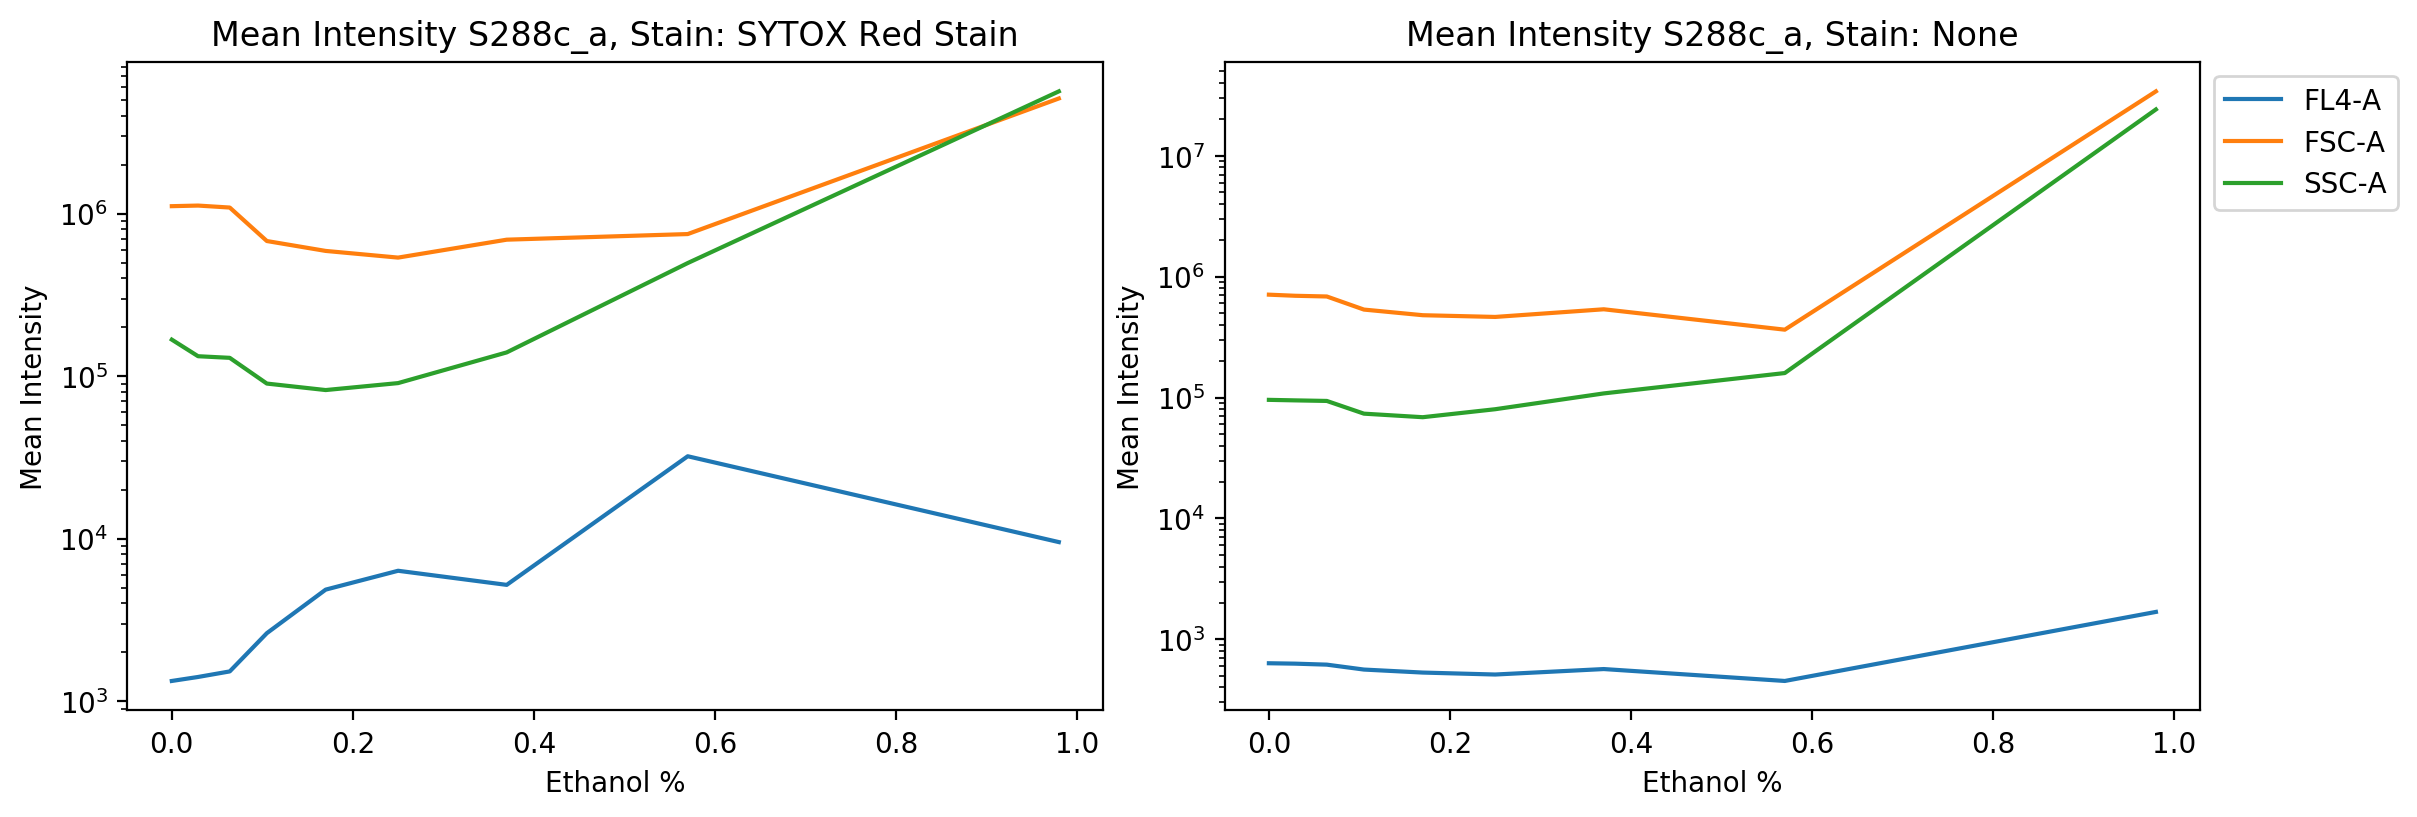

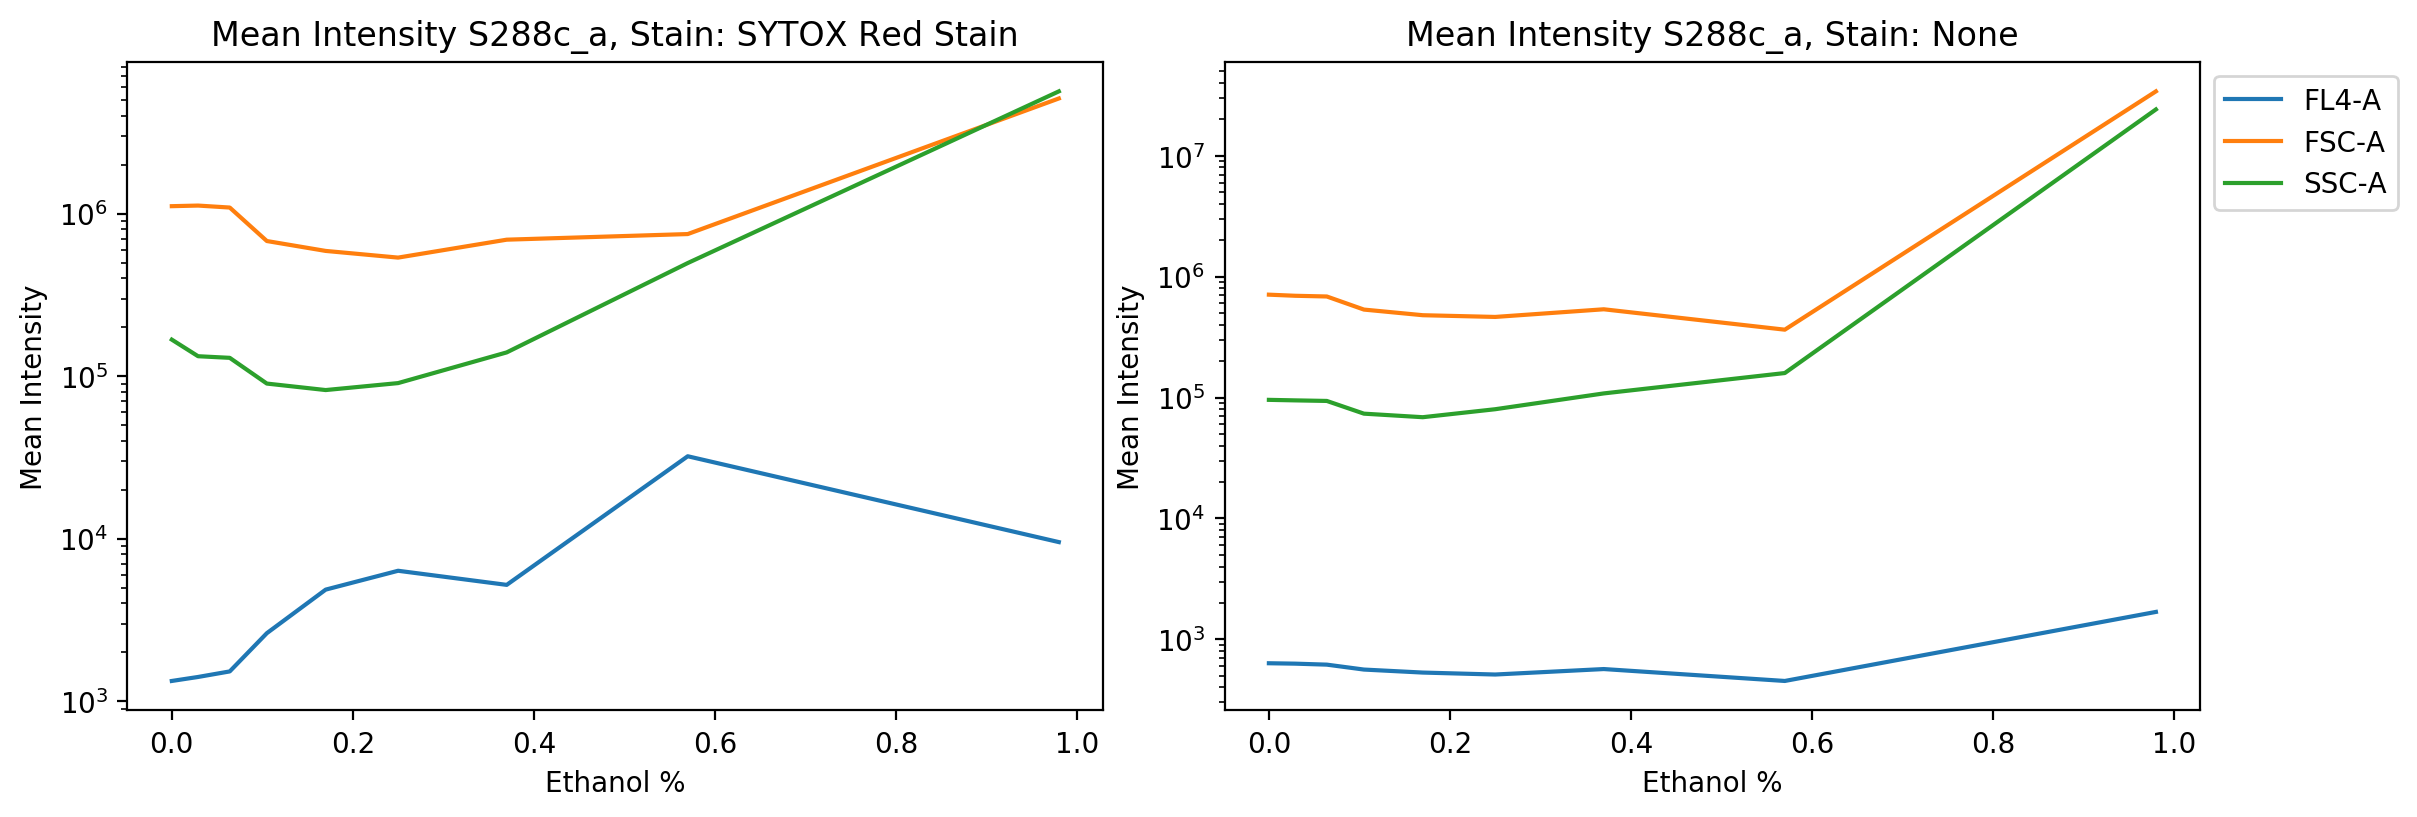

In [193]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)
print(experiment_df.live.value_counts())
channels=['FSC-A', 'SSC-A', 'FL4-A']
bldp.get_channel_mean_titration(experiment_df, only_live=False, channels=channels,stat=np.std)

['SYTOX Red Stain' nan]
  Container Type Control                  Culture_Volume                                                                                                                                                              Media Replicate Storage (C)                                                                                                                                                           Strain                                  checksum                                                                                    filename     kill  kill_volume  plate_id            source            stain well   experiment_id  Time      FSC-A      SSC-A   BL1-A    RL1-A    FSC-H     SSC-H  BL1-H    RL1-H   FSC-W   SSC-W  BL1-W  RL1-W  index  live  live_ss
0  96-pcr         {}      {'qty': 1000.0, 'units': 'uL'}  {'YPAD': {'item_id': 378596, 'item_concentration': None, 'final_concentration': None, 'dilution_factor': None, 'working_volume': {'qty': 1000.0, 'units': 'µl'}}}

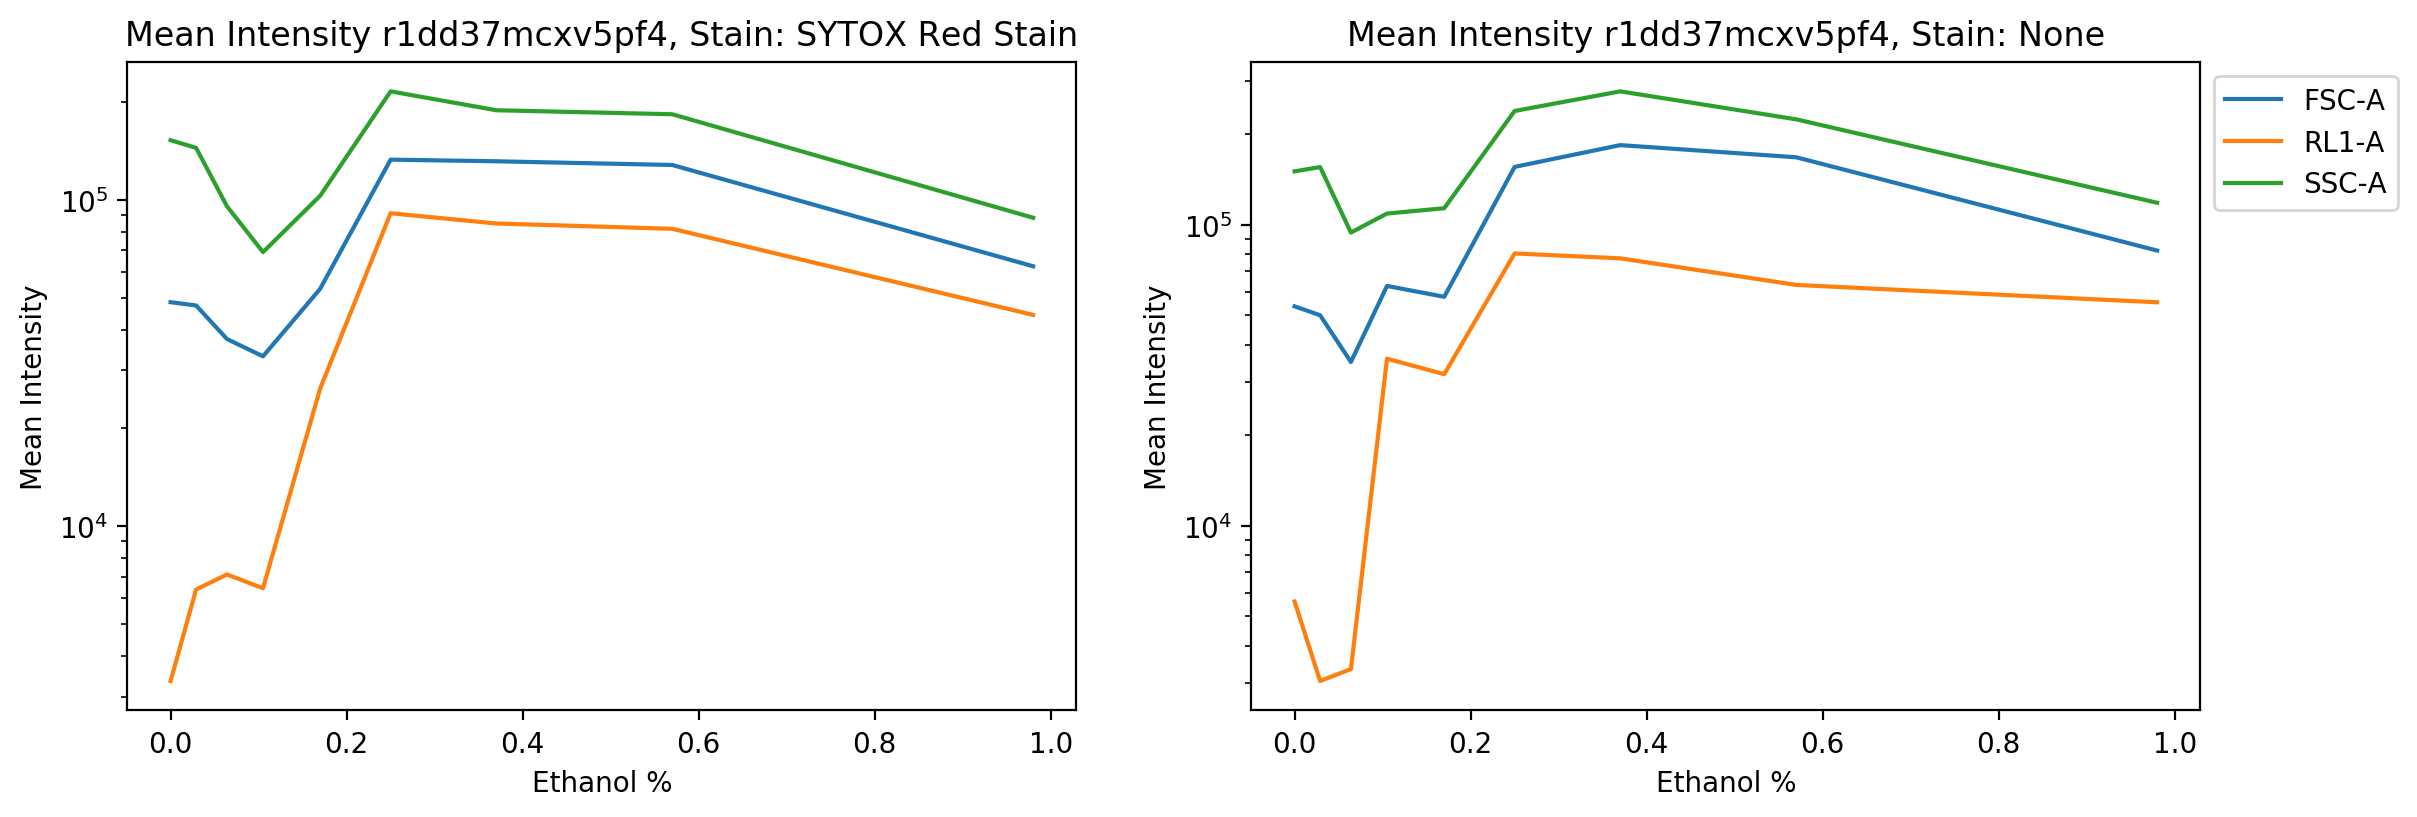

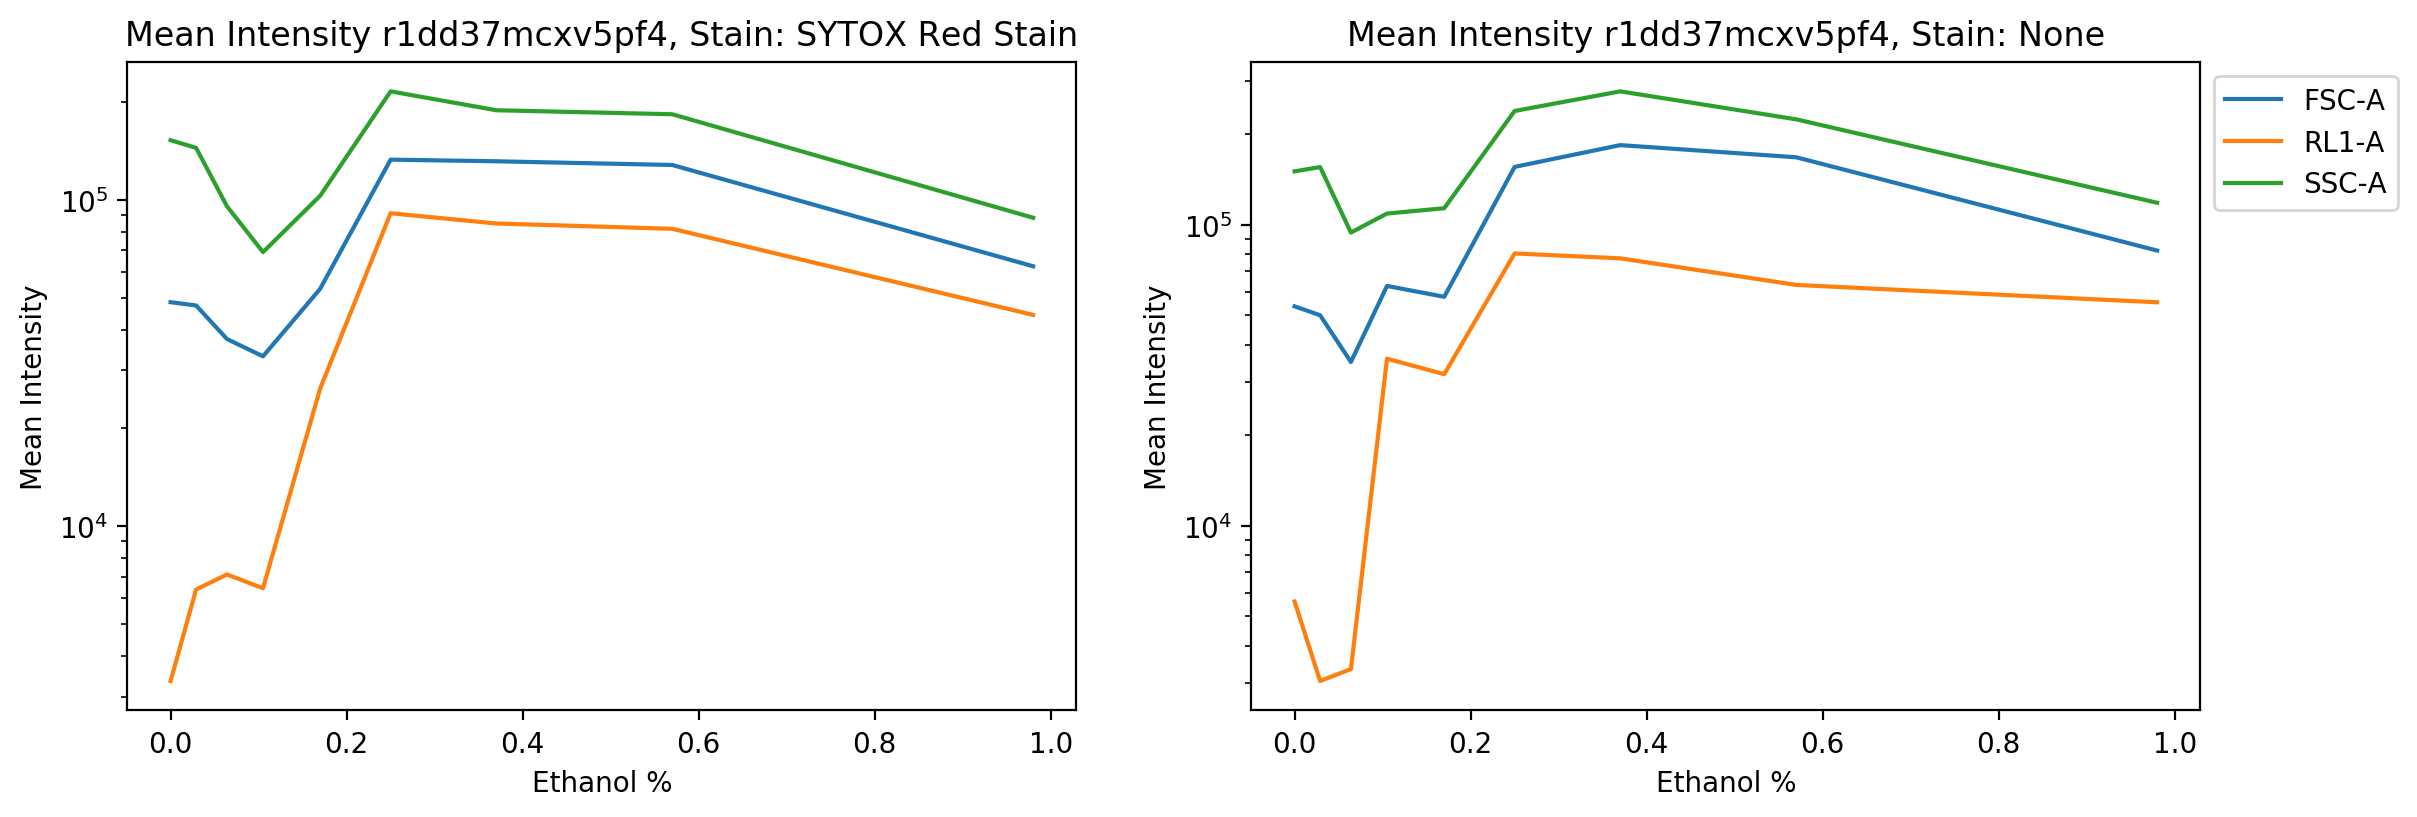

In [194]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)


channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W']
channels=['FSC-A', 'SSC-A', 'RL1-A']
bldp.get_channel_mean_titration(experiment_df, 
                               channels=channels,
                                stat=np.std
                               )

In [128]:
data_dir = os.path.join('data/biofab', experiments[1])
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

bldp.get_channel_histograms(experiment_df)

[autoreload of pysd2cat.plot.biofab_live_dead_plots failed: Traceback (most recent call last):
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 245, in check
    superreload(m, reload, self.old_objects)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/site-packages/IPython/extensions/autoreload.py", line 434, in superreload
    module = reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/imp.py", line 315, in reload
    return importlib.reload(module)
  File "/Users/danbryce/Documents/sift/xplan/external/xplan/xplan-to-autoprotocol-reactor/xplan-dev-env/xplan-dev-env/lib/python3.7/importlib/__init__.py", line 169, in reload
    _bootstrap._exec(spec, module)
  File "<frozen im

In [111]:
data_dir = os.path.join('data/transcriptic')
all_data_file = os.path.join(data_dir, 'data.csv')
experiment_df = pd.read_csv(all_data_file, index_col=0)

#bldp.get_channel_mean_titration(experiment_df)
bldp.get_channel_histograms(experiment_df, 
                               channels=['FSC-A', 'SSC-A', 'BL1-A', 'RL1-A', 'FSC-H', 
                                      'SSC-H', 'BL1-H', 'RL1-H', 'FSC-W', 'SSC-W',
                                      'BL1-W', 'RL1-W'])

In [159]:
all=experiment_df.loc[experiment_df['kill_volume'] == 250.0]['FL1-A'].sum()
live=experiment_df.loc[(experiment_df['kill_volume'] == 250.0) & (experiment_df['live'] == 1)]['FL1-A'].sum()
ratio = live/all
print(all)
print(live)
print(ratio)
print(experiment_df.loc[(experiment_df['kill_volume'] == 250.0)]['live'].mean())

407045863.0
376115824.0
0.9240133807722792
0.953375
